## Pumpkin Pricing

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

- Only get pumpkins priced by the bushel
- Convert the date to a month
- Calculate the price to be an average of high and low prices
- Convert the price to reflect the pricing by bushel quantity

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [4]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

columns_to_select = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


A basic scatterplot reminds us that we only have month data from August through December. We probably need more data to be able to draw conclusions in a linear fashion.

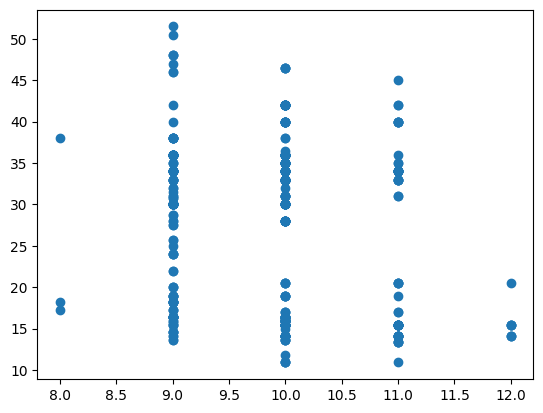

In [5]:
import matplotlib.pyplot as plt
plt.scatter('Month','Price',data=new_pumpkins)

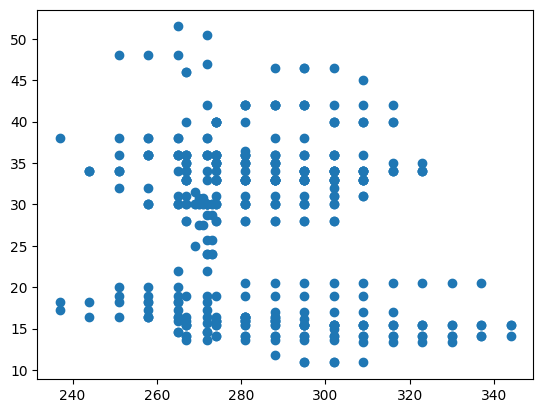

In [6]:

plt.scatter('DayOfYear','Price',data=new_pumpkins)

In [15]:

print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077535
-0.16673322492745407


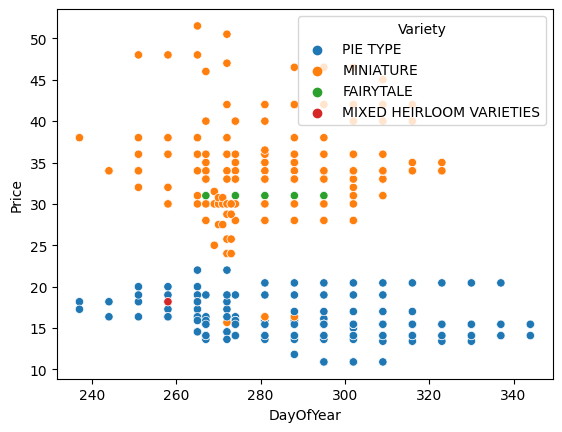

In [16]:
sn.scatterplot(x='DayOfYear',y='Price', data=new_pumpkins, hue='Variety')
plt.show()

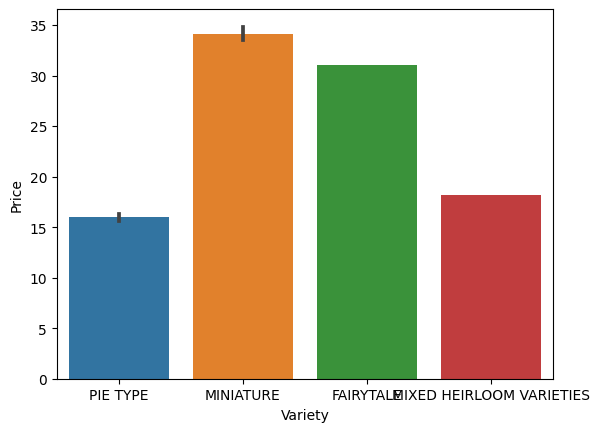

In [17]:
sn.barplot(x='Variety',y='Price',data=new_pumpkins)
plt.show()

In [24]:
#As the variety place a role in the price movement, we will look at subsetting the data by Variety
Pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
Pie_pumpkins.reset_index(drop=True,inplace=True)
Pie_pumpkins.head()

,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
0,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
1,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
2,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
3,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
4,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


In [87]:
X= Pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y= Pie_pumpkins['Price']

In [88]:
#Splitting the data
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)



In [89]:
#Create the regression model
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [90]:
#Assign the prediction from the model
y_pred= model.predict(X_test)

#check our accuracy
mse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')

Mean error: 2.77 (17.2%)


In [91]:
score = model.score(X_train,y_train)
print(f'The score is: {score}')

The score is: 0.04460606335028361


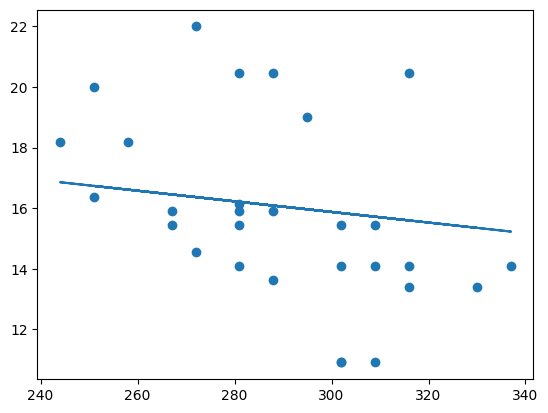

In [49]:
#Plotting the data
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred)

In [92]:
# Trying Polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#we will include all second-degree polynomials from the input data. 
# In our case it will just mean DayOfYear2, but given two input variables X and Y, this will add X2, XY and Y2.

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [93]:
y_pred2 = pipeline.predict(X_test)

In [94]:
#check our accuracy
mse = np.sqrt(mean_squared_error(y_test,y_pred2))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred2)*100:3.3}%)')

Mean error: 2.73 (17.0%)


In [95]:
score = pipeline.score(X_train,y_train)
print(f'The score is: {score}')

The score is: 0.07639977655280161


In [96]:
pd.get_dummies(new_pumpkins['Variety'],dtype=int)

,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
70,0,0,0,1
71,0,0,0,1
72,0,0,0,1
73,0,0,0,1
74,0,0,0,1
...,...,...,...,...
1738,0,1,0,0
1739,0,1,0,0
1740,0,1,0,0
1741,0,1,0,0


In [97]:
#Lets include a categorical variable Variety
X=pd.get_dummies(new_pumpkins['Variety'],dtype=int)
y= new_pumpkins['Price']

#Splitting the data
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)


In [98]:
#Poly model

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [99]:
y_pred3 = pipeline.predict(X_test)
#check our accuracy
mse = np.sqrt(mean_squared_error(y_test,y_pred3))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred3)*100:3.3}%)')

Mean error: 5.19 (19.6%)


In [100]:
score = pipeline.score(X_train,y_train)
print(f'The score is: {score}')

The score is: 0.7648365013279539


In [101]:
#Linear model
#Create the regression model
model= LinearRegression()
model.fit(X_train,y_train)


#Assign the prediction from the model
y_pred4= model.predict(X_test)

#check our accuracy
mse = np.sqrt(mean_squared_error(y_test,y_pred4))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred4)*100:3.3}%)')

Mean error: 5.28 (19.9%)


In [102]:
score =model.score(X_train,y_train)
print(f'The score is: {score}')

The score is: 0.7728169593615176


In [107]:
#Variety + City
X=pd.get_dummies(new_pumpkins['Variety'],dtype=int).join(pd.get_dummies(new_pumpkins['City'],dtype=int))
y=new_pumpkins['Price']

#Splitting the data
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [108]:
#Linear Model
model = LinearRegression()
model.fit(X_train,y_train)

y_pred5= model.predict(X_test)

mse= np.sqrt(mean_squared_error(y_test,y_pred5))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred5)*100:3.3})%')

Mean error: 4.09 (15.1)%


In [109]:
score =model.score(X_train,y_train)
print(f'The score is: {score}')

The score is: 0.8747563357136857


In [115]:
X=pd.get_dummies(new_pumpkins['Variety'],dtype=int).join(pd.get_dummies(new_pumpkins['City'],dtype=int)).join(pd.get_dummies(new_pumpkins['Package'],dtype=int))
y=new_pumpkins['Price']

#Splitting the data
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [116]:
#Linear Model with Variety + City + Packages
model = LinearRegression()
model.fit(X_train,y_train)

y_pred5= model.predict(X_test)

mse= np.sqrt(mean_squared_error(y_test,y_pred5))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred5)*100:3.3})%')

Mean error: 2.9 (10.8)%


In [117]:
score =model.score(X_train,y_train)
print(f'The score is: {score}')

The score is: 0.9381163524471989


In [118]:
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

y_pred6 = pipeline.predict(X_test)
#check our accuracy
mse = np.sqrt(mean_squared_error(y_test,y_pred6))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred6)*100:3.3}%)')

Mean error: 2.44 (9.0%)


In [120]:
score =pipeline.score(X_train,y_train)
print(f'The score is: {score}')

The score is: 0.9569349008901523


In [123]:
X= pd.get_dummies(new_pumpkins['Variety'],dtype=int)\
    .join(pd.get_dummies(new_pumpkins['City'],dtype=int))\
        .join(pd.get_dummies(new_pumpkins['Package'],dtype=int))\
            .join(new_pumpkins['Month'])

y=new_pumpkins['Price']

#Splitting the data
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [124]:
#Linear Model with Variety + City + Packages + month
model = LinearRegression()
model.fit(X_train,y_train)

y_pred= model.predict(X_test)

mse= np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred)*100:3.3})%')

Mean error: 2.88 (10.7)%


In [125]:
score =model.score(X_train,y_train)
print(f'The score is: {score}')

The score is: 0.9395577241673829


In [126]:
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

y_pred = pipeline.predict(X_test)
#check our accuracy
mse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')

Mean error: 2.22 (8.23%)


In [127]:
score =pipeline.score(X_train,y_train)
print(f'The score is: {score}')

The score is: 0.9652039256411357
